In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb


In [5]:
#Read the advertising data
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",
                  index_col = 0)
#index_col = Column to use as the row labels of the DataFrame


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
#Understanding the data

#1. Look at the data
    #Show the 5 entries of the data
data.head()

#2. What is the dimension of the dataset
print("Dimension of the data set:", np.shape(data))
#alternatively, can use data.shape

#There are 200 observations and 4 columen
# As seen in the head(), the names of columns are TV, Radio, Newspaper, 
# and Sales. For this example Sales is output and other 3 are the input
# ie. we want to predict sales based on advertising spending on 3 mediums


Dimension of the data set: (200, 4)


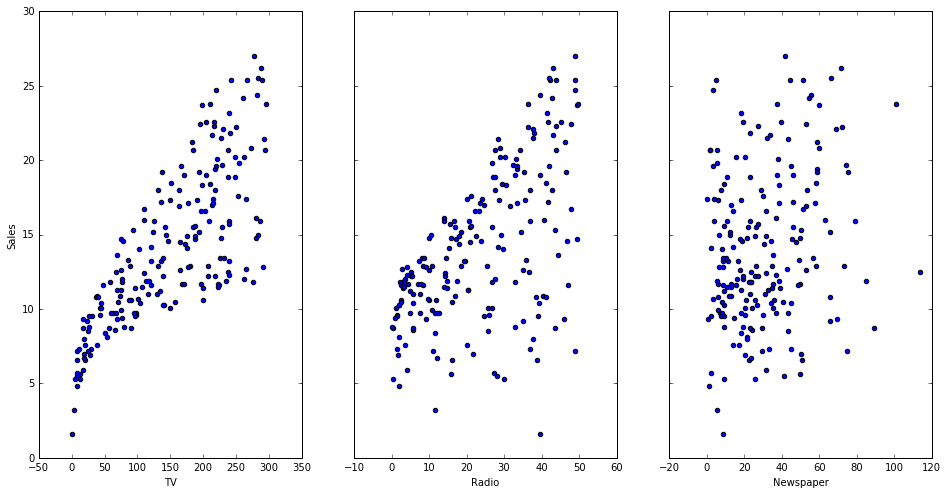

In [36]:
fig,axs = plt.subplots(1,3, sharey = True)
data.plot(kind = "scatter",x ="TV", y ="Sales",ax = axs[0], figsize=(16,8))
data.plot(kind = "scatter",x ="Radio", y ="Sales",ax = axs[1])
data.plot(kind = "scatter",x ="Newspaper", y ="Sales",ax = axs[2])


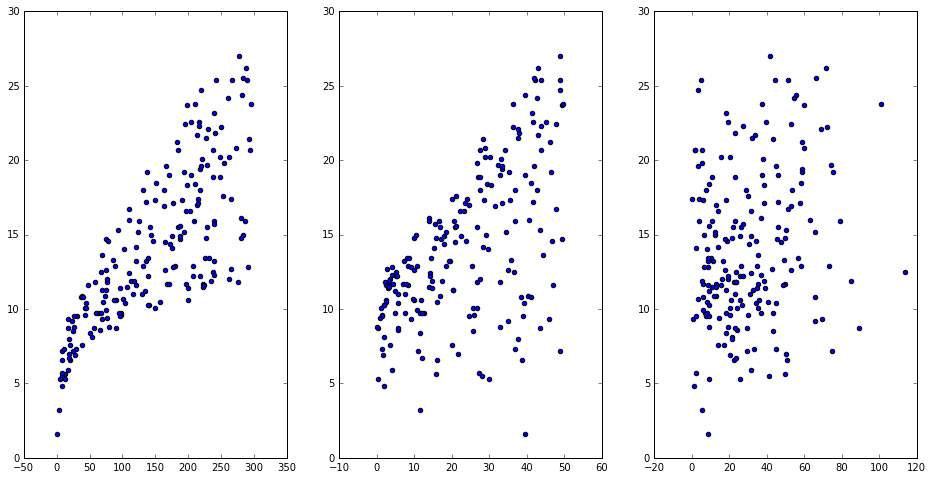

In [51]:
#Alternative
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,8))
ax1.scatter(data["TV"], data["Sales"])
ax2.scatter(data["Radio"], data["Sales"])
ax3.scatter(data["Newspaper"], data["Sales"])

Intercept is:  [ 7.03259355]
Slope or coefficient of height is:  [[ 0.04753664]]


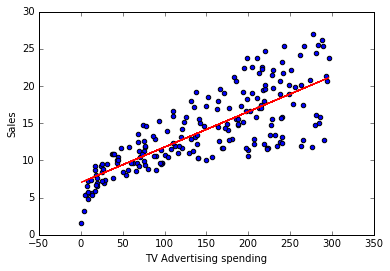

In [72]:
#Use linear regression here
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

tv = data["TV"].reshape(-1,1)
radio = data["Radio"].reshape(-1,1)
np = data["Newspaper"].reshape(-1,1)
s = data["Sales"].reshape(-1,1)

lm.fit(tv, s)

fig, ax = plt.subplots(1,1)
ax.scatter(data["TV"],data["Sales"])
ax.plot(tv, lm.predict(tv), color = "r")
ax.set_xlabel("TV Advertising spending")
ax.set_ylabel("Sales")


In [75]:
#Print the coefficients of linear regression
print("Intercept is: ", lm.intercept_)
print("Slope or coefficient of height is: ", lm.coef_)

Intercept is:  [ 7.03259355]
Slope or coefficient of height is:  [[ 0.04753664]]


In [157]:
# What does the coefficient say?
# 1 unit increase in x axis == 0.047 units increase in y axis
# 1 unit increase in TV advertising spending, increases Sales by .047 units
# $1000 Additional dollars on TV advertising increases sales by 47 units/sets

In [140]:
#Confidence Intervals: Couldn't find a way with sklearn.linear_model
#Use statsmodel: Apparently thats recommended for doing statistics in python

In [145]:
#Multi-linear regression with Sci-Kit
lm = LinearRegression()
cols = ['TV', "Radio", "Newspaper"]
X = data[cols]
Y = data["Sales"]
lm.fit(X,Y)

print("Multi-Linear Regression: Intercept-", lm.intercept_)
print("Multi-Linear Regression: Slope-", lm.coef_)

Multi-Linear Regression: Intercept- 2.93888936946
Multi-Linear Regression: Slope- [ 0.04576465  0.18853002 -0.00103749]


In [158]:
#Prediction for a new variable


In [80]:
import statsmodels.formula.api as smf

#create fitted model
lm = smf.ols(formula = "Sales~TV", data = data) #Lm is a OLS object
#Syntax here is similar to R
lm.fit = lm.fit() 

lm.fit.params #Parameters of the least square regression


Intercept    7.032594
TV           0.047537
dtype: float64

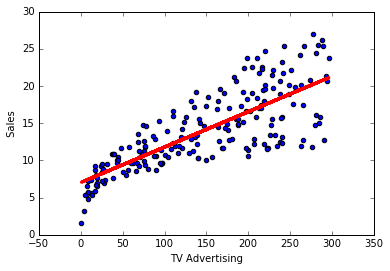

In [108]:
#Using the model for prediction

#need to create a new dataframe as Statsmodel formula interface expects it
x_new = pd.DataFrame({"TV":list(data["TV"])})
lm.fit.predict(x_new)

fig, ax = plt.subplots(1,1)
ax.scatter(tv,s)
ax.plot(tv, lm.fit.predict(x_new), color = 'r', lw = 3.0)
ax.set_xlabel("TV Advertising")
ax.set_ylabel(" Sales ")


In [116]:
#Confidence intervals
print("Confidence Intervals\n", lm.fit.conf_int())


Confidence Intervals
                   0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


In [117]:
#P-vaues
print("\nP-values\n", lm.fit.pvalues)


P-values
 Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [119]:
#RSquare (1- RSS/TSS)
lm.fit.rsquared

0.61187505085007099

In [120]:
#Multi-linear regression

#Create a model with all three features
mlm = smf.ols(formula = 'Sales~TV+Radio+Newspaper', data = data)
mlm.fit = mlm.fit()

In [123]:
#Coefficients of the model
mlm.fit.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [124]:
#Interpreting the coefficients
#Holding Newspaper and TV advertising constant; if we increase the advertising
#revenue in TV by 1000 dollars, then we sell 45.7 additional units

In [125]:
#Summary of the model
mlm.fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 10 Sep 2016   Prob (F-statistic):           1.58e-96
Time:                        06:56:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""